In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from livelossplot.keras import PlotLossesCallback
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Input
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler, Callback
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
# for training our model
train_values = pd.read_csv('train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

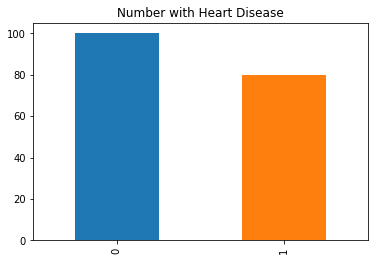

In [3]:
train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

In [4]:
#selected_features = ['age', 
#                     'sex', 
#                     'max_heart_rate_achieved', 
#                     'resting_blood_pressure']
selected_features =['slope_of_peak_exercise_st_segment',
'resting_blood_pressure',
'chest_pain_type',
'num_major_vessels',
'fasting_blood_sugar_gt_120_mg_per_dl',
'resting_ekg_results',
'serum_cholesterol_mg_per_dl',
'oldpeak_eq_st_depression',
'sex',
'age',
'max_heart_rate_achieved',
'exercise_induced_angina']
train_values_subset = train_values[selected_features]
X_test = test_values[selected_features]
predictors =train_values_subset
target = train_labels.heart_disease_present
X_train,X_val,Y_train,Y_val = train_test_split(predictors,target,test_size=0.10,random_state=0)

In [5]:

# network parameters
batch_size = 128 #128
hidden_units = 256
dropout = 0.2
input_size=12
weight_decay= 1e-4

In [6]:
model = Sequential()

model.add(Dense(1024, input_dim=input_size,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
#model.add(Dropout(dropout))

model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
#model.add(Dropout(dropout))

model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
#model.add(Dropout(dropout))

model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
#model.add(Dropout(dropout))

model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Dropout(dropout))


model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              13312     
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
__________

In [7]:
model.compile(loss='binary_crossentropy', #
              optimizer='adam', #adam
              metrics=['accuracy'])

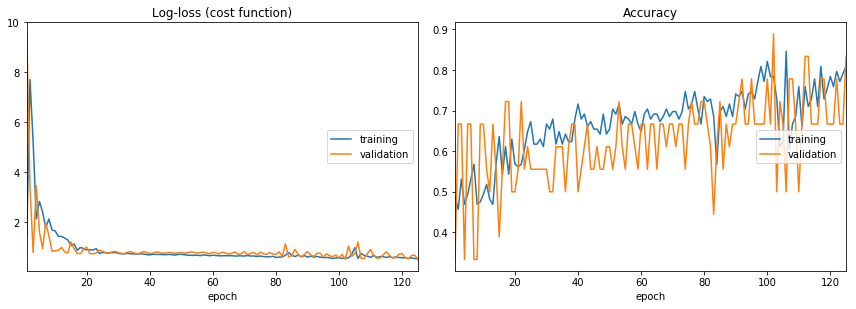

Log-loss (cost function):
training   (min:    0.529, max:    7.709, cur:    0.529)
validation (min:    0.500, max:    9.537, cur:    0.500)

Accuracy:
training   (min:    0.457, max:    0.846, cur:    0.809)
validation (min:    0.333, max:    0.889, cur:    0.833)


In [8]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=125, verbose=2, batch_size=256,
              callbacks=[PlotLossesCallback()])

In [9]:
predictions=model.predict(X_test, batch_size=128)

In [10]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [11]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [12]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.216229
z9n6mx,0.044012
5k4413,0.694080
mrg7q5,0.049285
uki4do,0.799604


In [13]:
my_submission.to_csv('submission2.csv')
#validation log loss =0.54680